# Decision Tree Classifier Case Study - Iris Flower Species Classification

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.<br> 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

The dataset consists 6 attributes: <br>
1. Id - an unique Id for each tuple
1. sepal length(cm)
2. sepal width(cm)
3. petal length(cm)
4. petal width(cm)
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

## 1.Getting the system ready and Loading the data

In [1]:
# Import required libraries

# pandas: A python library used for data manipulation.
# numpy: A python library used for arithmetic operations on arrays.
import pandas as pd
import numpy as np

# To split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# To build a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# To estimate best parameters for the model
from sklearn.model_selection import GridSearchCV

# Import scikit-learn metrics module to calculate the model accuracy.
from sklearn import metrics

# Seaborn - A python visualisation library based on Matplotlib.
# Visuals that need around 20 lines of code using Matplotlib can be created
# with seaborn by reducing the code to 5-fold.
import seaborn as sns


# Ignoring all warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data.
# pandas.read_csv is used to load the files with csv format
iris_data = pd.read_csv('IrisSpeciesClassification.csv')

### Exploring Data

In [3]:
# Previewing our data using the code below.
# DataFrame.head() method is used to display the first 5 rows from the data.
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# DataFrame.tail() method is used to display the first 5 rows from the data.
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Showing information about a DataFrame including the index dtype and columns, non-null values and memory usage.
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


float64 - repreents a floating point number.<br>
int64 - represents an integer number.<br>
object - represents a string type in pandas DataFrame.

In [6]:
# Removing 'Id' column from the dataset; since it is not an useful parameter to classify Iris Flower
# pandas DataFrame.drop() method can be used to drop the 
iris_data.drop('Id', axis=1, inplace=True)

In [7]:
# Previewing data after droping 'Id'.
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Checking whether the dataset is having any Null values.
# DataFrame.isnull() returns either True or False for each data point if it is Null or not Null respectively
# The sum() method is used to calculate number of instances of True values
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Cool! The dataset doesn't have any null values.

## 2. Data Preprocessing and Eploratory Data Analysis

### Exploring Target Variable - Species
#### The process of analyzing a single variable is termed as Univariate Analysis.

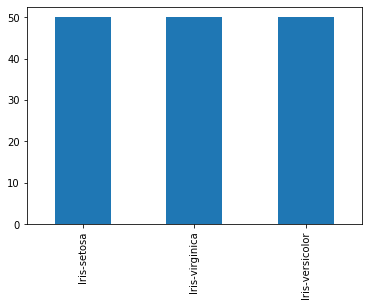

In [9]:
# value_counts() is used to count the number of instances of each unique datapoint.
# plot() is used to plot the graph, the parameter 'kind' represents the type of graph
iris_data['Species'].value_counts().plot(kind='bar')

There are 50 instances of each class group. We also learned this while describing the dataset above.

### Exploring Independent Variables

In [10]:
# The describe() method provides descriptive statistics of the dataset.
iris_data.describe()

# 'count' tells the number of non-NA/null observations.
# 'max' shows the maximum of the values in the object.
# 'min' shows the minimum of the values in the object.
# 'mean' shows the Mean of the values.
# 'std' shows the Standard deviation of the observations.
# Standard deviation is a measure of amount of variation of a set of values,
# it tells how the spread out the data is.
# A low standard deviation means that most of the numbers are close to the average (mean)
# A high standard deviation means that the numbers are more spread out
# Percentile- a measure used in statistics indicating the value
# below which a given percentage of observations in a group of observations falls.
# Percentile provides where the value actually lies in the data.
# 25% shows that 25 percent of the data lies below that number.
# 50% shows that 50 percent of the data lies below that number.
# 75% shows that 75 percent of the data lies below that number.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking if any outliers are present in the data <br>
A box plot is used to find any outliers are present in the features.<br>

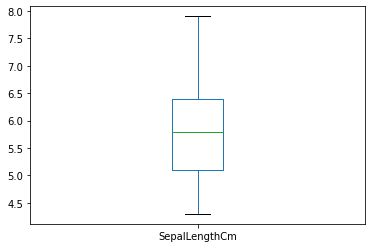

In [11]:
# Outliers in Sepal Length(cm)
iris_data['SepalLengthCm'].plot(kind='box')

SepalLength(cm) feature has no outliers.

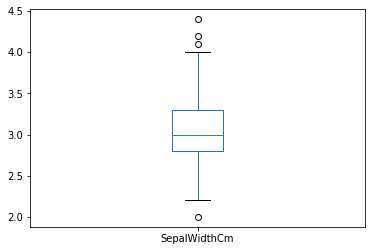

In [12]:
# Outliers in Sepal Width(cm)
iris_data['SepalWidthCm'].plot(kind='box')

SepalWidth(cm) feature has outliers.

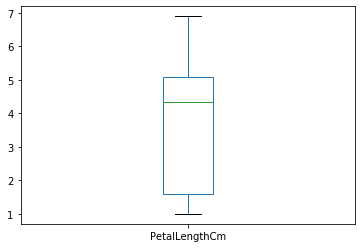

In [13]:
# Outliers in Petal Length(cm)
iris_data['PetalLengthCm'].plot(kind='box')

PetalLength(cm) feature has no outliers.

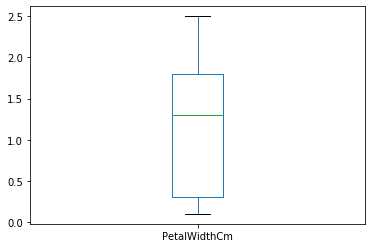

In [14]:
# Outliers in Petal Width(cm)
iris_data['PetalWidthCm'].plot(kind='box')

PetalWidth(cm) feature has no outliers.

#### Treating Outliers present in SepalWidth(cm) feature.
Any datapoint present above the upper limit i.e (75th quartile + 1.5 * inter quartile region) or <br>
Any datapoint present below the lower limit i.e (25th quartile - 1.5 * inter quartile region) is considered to be an outlier. <br>
##### Inter Quartile Region(IQR) = 75th Quartile(Q3) - 25th Quartile(Q1)

In [15]:
# Getting Q1 and Q3 of SepalWidth(cm) feature
q1 = iris_data['SepalWidthCm'].quantile(0.25)
q3 = iris_data['SepalWidthCm'].quantile(0.75)

# Calculating Inter Quartile Region
iqr = q3 - q1

# Setting lower and upper limits
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

# Treating outliers by Imputing method
# Any datapoint above upper limit is set to upper limit value.
# Any datapoint below lower limit is set to lower limit value.
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

# Using apply() method to apply the limit_imputer function
iris_data['SepalWidthCm'] = iris_data['SepalWidthCm'].apply(limit_imputer)

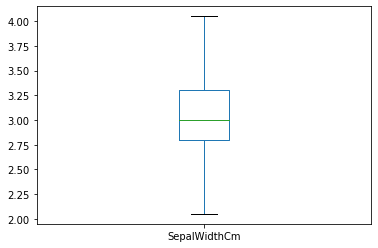

In [16]:
# Box plot of SepalWidth(cm) after treating outliers
iris_data['SepalWidthCm'].plot(kind='box')

You can observe that there are no outliers.

Extracting target varaible and independent variables seperately.

In [17]:
# X contains independent variables
# y contains the target variable
# DataFrame.drop() method is used to drop a feature from the dataset. 
# axis=1 tells the drop method to drop the column.
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split data using train_test_split
# train_test_split splits X and y randomly
# test_size tells the portion of data to select for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [18]:
# Previewing X_train data
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
134,6.1,2.6,5.6,1.4
28,5.2,3.4,1.4,0.2
65,6.7,3.1,4.4,1.4
0,5.1,3.5,1.4,0.2
27,5.2,3.5,1.5,0.2


In [19]:
# Shape of X_train
X_train.shape
# (a, b) represents tuple of b dimensional array of size a.

(105, 4)

In [20]:
# Previewing y_train data
y_train.head()

134     Iris-virginica
28         Iris-setosa
65     Iris-versicolor
0          Iris-setosa
27         Iris-setosa
Name: Species, dtype: object

In [21]:
# Shape of y_train
y_train.shape
# (a,) represents a tuple of a entries | A one dimensional array of size a.

(105,)

## 3. Model Building

In [22]:
# 1. Instantiate
# default criterion=gini
# you can swap to criterion=entropy 
dtc = DecisionTreeClassifier(random_state=0)

# 2. Fit
dtc.fit(X_train, y_train)

# 3. Predict, there're 4 features in the iris dataset
y_pred = dtc.predict(X_test)

In [23]:
# Looking at the parameters selected by the model by default
dtc.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')>

## 4. Model Evaluation

In [24]:
# accuracy_score tells the overall accuracy of a model
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

**Dealing with overfitting: min_samples_split**<br>
    Since default min_samples_split=2 :<br>
    - If you've 1 sample left in a node, you cannot split further.<br>
    - When it gets really deep in depth, it overfits your data. <br>

**If you increase your min_samples_split value** <br>
    - You would decrease the depth of your tree i.e you would run out of samples to split.<br>
    - This would reduce overfitting.

#### Although the dataset isn't too large and doesn't require any parameter tuning, just look at how parameter tuning is performed using Cross Validation.

In [25]:
# Defining the parameter values that should be searched.
# We want to select a optimal value for min_samples_split.
# Since the dataset contains 4 independent features we can select from a range of 1 to 4 minimum samples to split.
sample_split_range = list(range(1, 5))

# Creating a parameter grid: maps the parameter names to the values that should be searched,
# here the parameter is min_samples_split.
# The grid is nothing but a Python Dictionary:
# Key: parameter name and
# Value: list of values that should be searched for that parameter.
param_grid = dict(min_samples_split=sample_split_range)

# instantiate the grid,
# cv = 10 represents that split the data into 10 folds
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [1, 2, 3, 4]},
             pre

In [26]:
# The GridSearchCV returns a list of values representing the model score for each min_samples_split value.
# Dictionary containing the parameters (min_samples_split) used to generate the best score.
print('Parameters for Best Score:',grid.best_params_)

# Actual model object fit with those best parameters.
# Shows default parameters that we did not specify.
print('Model for Best Score: ',grid.best_estimator_)

Parameters for Best Score: {'min_samples_split': 2}
Model for Best Score:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


##### Cool! the model with best score has the same parameters as the model we used above by default. <br>
Since the dataset is small, the model doesn't require any specific parameter tuning. <br>
Here the parameter tuning is done to give you an example on how Cross Validation is used to select optimal parameters while building a model.

### Plotting the Decision Tree Classifer

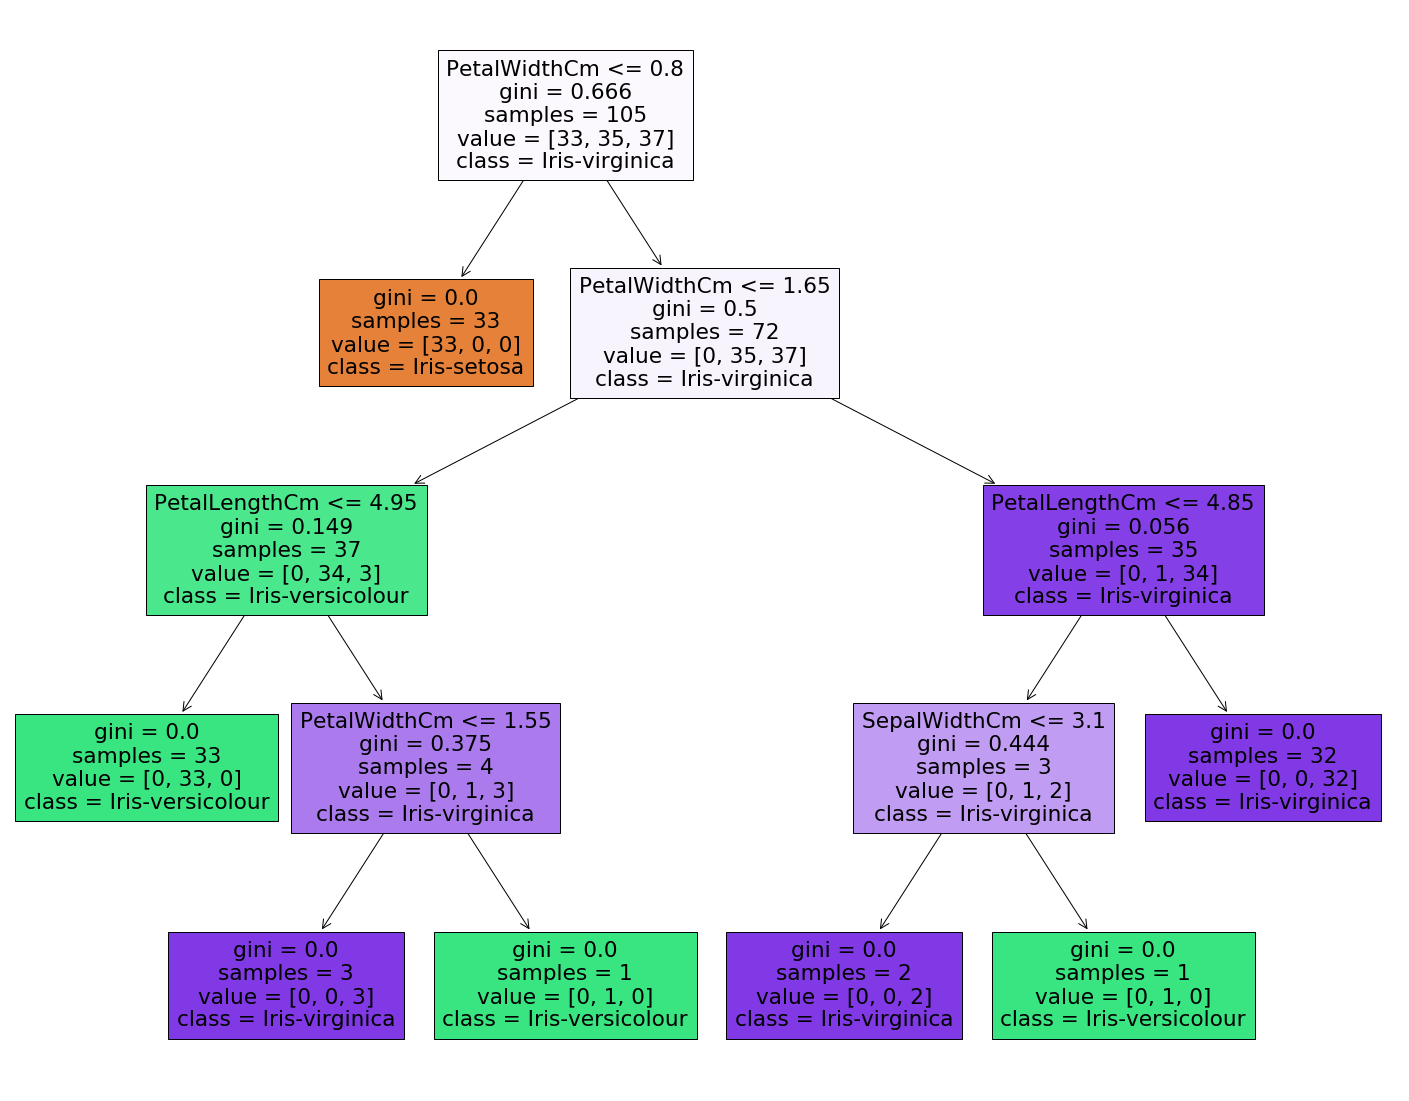

In [27]:
from sklearn import tree

# Matplotlib is a low-level library with a Matlab like interface, 
# good for creating basic graphs like Line Chart, Bar Chart, Histogram, etc.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=X.columns,  
                   class_names=['Iris-setosa', 'Iris-versicolour', 'Iris-virginica'],
                   filled=True)

The attribute with lowest Gini Index is used as a node to split.

In [28]:
# Building the Decision Tree using 'Entropy'

# 1. Instantiate
# criterion=entropy 
dtc_ent = DecisionTreeClassifier(random_state=0, criterion='entropy')

# 2. Fit
dtc_ent.fit(X_train, y_train)

# 3. Predict, there're 4 features in the iris dataset
y_pred_ent = dtc_ent.predict(X_test)

In [29]:
# Accuracy of the model when using 'Entropy' to split the nodes.
metrics.accuracy_score(y_test, y_pred_ent)

0.9555555555555556

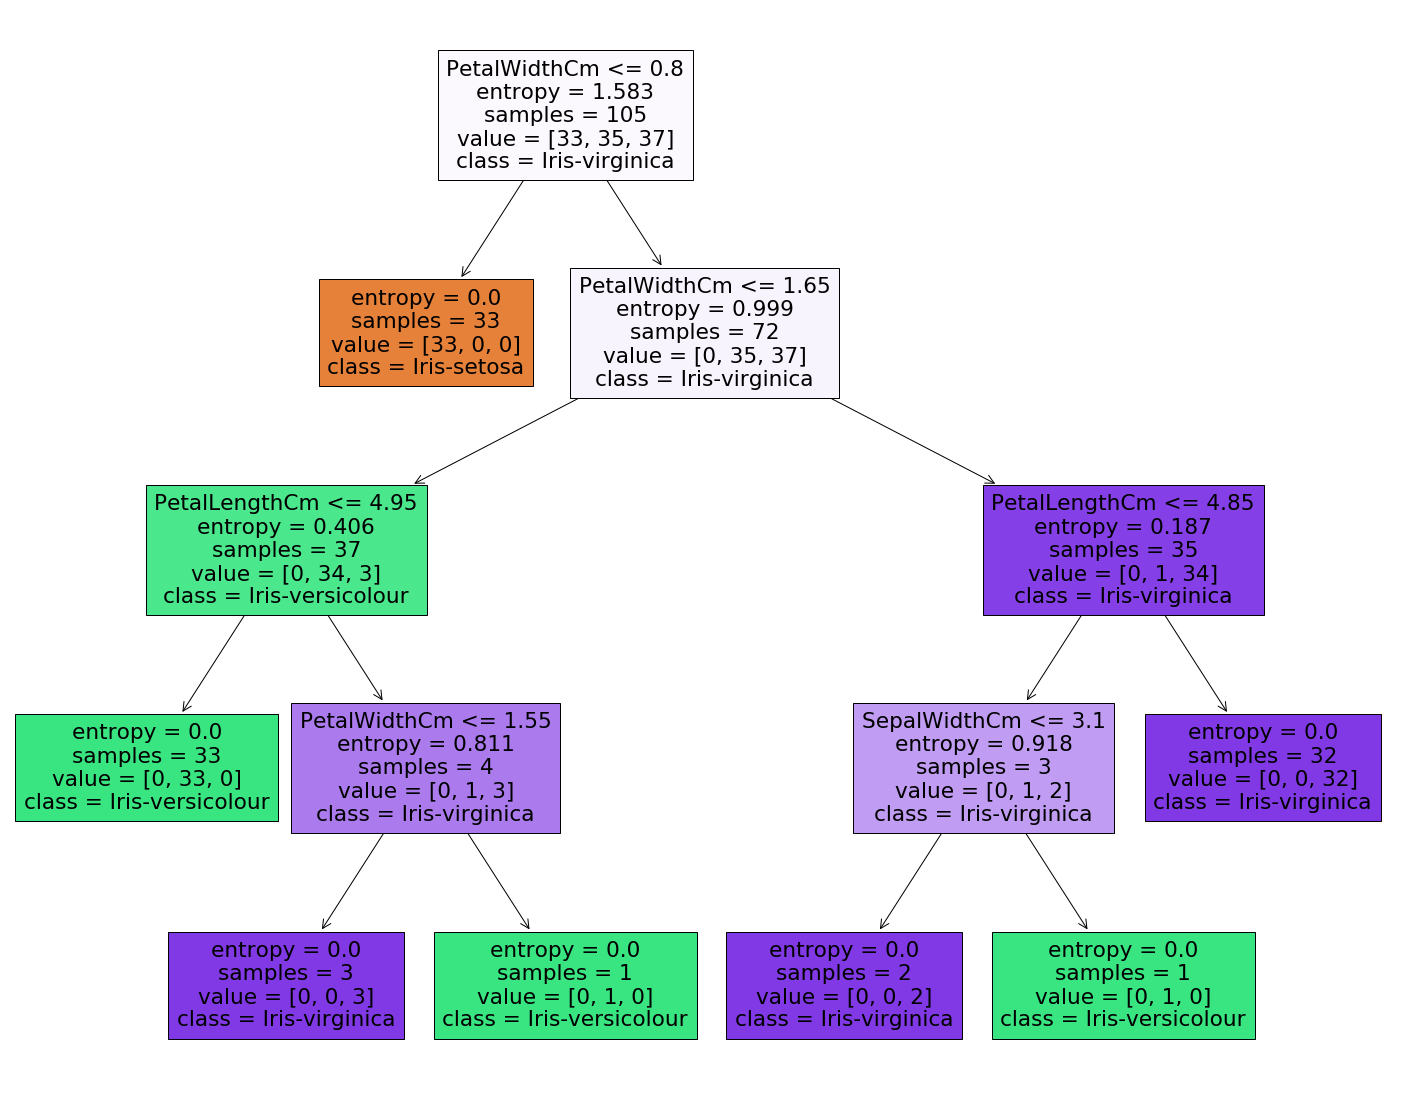

In [30]:
# Plotting the tree
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc_ent, 
                   feature_names=X.columns,  
                   class_names=['Iris-setosa', 'Iris-versicolour', 'Iris-virginica'],
                   filled=True)

Since the dataset we used has lower dimensions we can observe similar tree structure.

Thus we have seen how a Decision Tree is used to solve a classification problem.